In [ ]:
!pip install pixellib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
json_path = '/content/drive/MyDrive/Colab_Notebooks/instances_val2017.json/instances_val2017.json'
images_dir = '/content/drive/MyDrive/Colab_Notebooks/val2017/'

In [6]:
import os
import math
import random
import json
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import matplotlib.patches as patches
import sklearn.metrics as met
from PIL import Image, ImageEnhance, ImageDraw
from skimage import color, draw
from skimage.transform import resize
from skimage.segmentation import active_contour
import pixellib

In [7]:
# Load the JSON file
with open(json_path, 'r') as f:
    data = json.load(f)

In [24]:
# Extract images and annotations
images = data.get('images', [])
annotations = data.get('annotations', [])
categories = data.get('categories', [])
category_mapping = {cat['id']: cat['name'] for cat in categories}

In [25]:
# Function to get annotations for an image
def get_annotations_for_image(image_id, annotations):
    return [ann for ann in annotations if ann['image_id'] == image_id]

In [26]:
# Select a random image
sample_image_info = random.choice(images)
image_id = sample_image_info['id']
file_name = sample_image_info['file_name']
image_path = os.path.join(images_dir, file_name)
print(f"Selected Image: {file_name}")

Selected Image: 000000447522.jpg


In [27]:
# Read the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image not found: {image_path}")

In [28]:
# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

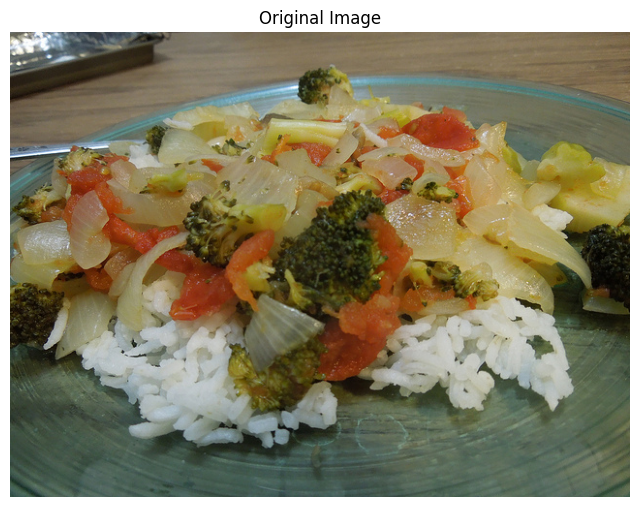

In [29]:
# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

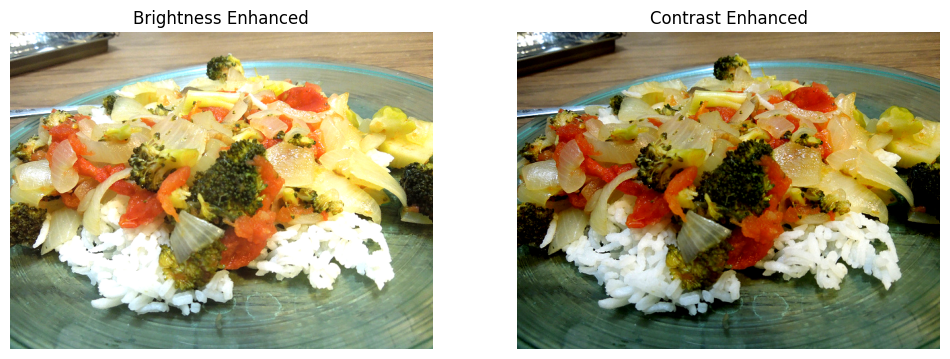

In [ ]:
# 1. Image Enhancement
# Enhance brightness
enhancer = ImageEnhance.Brightness(Image.fromarray(image_rgb))
bright_image = np.array(enhancer.enhance(1.5))  # Increase brightness by 1.5 times

# Enhance contrast
enhancer = ImageEnhance.Contrast(Image.fromarray(image_rgb))
contrast_image = np.array(enhancer.enhance(1.5))  # Increase contrast by 1.5 times

# Display enhanced images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(bright_image)
ax[0].set_title("Brightness Enhanced")
ax[0].axis("off")
ax[1].imshow(contrast_image)
ax[1].set_title("Contrast Enhanced")
ax[1].axis("off")
plt.show()

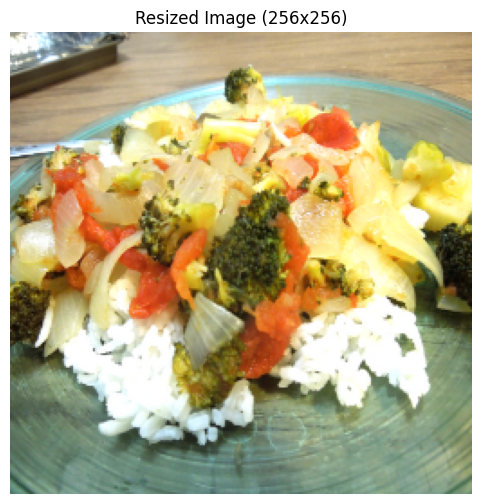

In [ ]:
# 2. Resize the image
resized_image = resize(bright_image, (256, 256))  # Resize to 256x256 pixels

plt.figure(figsize=(6, 6))
plt.imshow(resized_image)
plt.title("Resized Image (256x256)")
plt.axis("off")
plt.show()

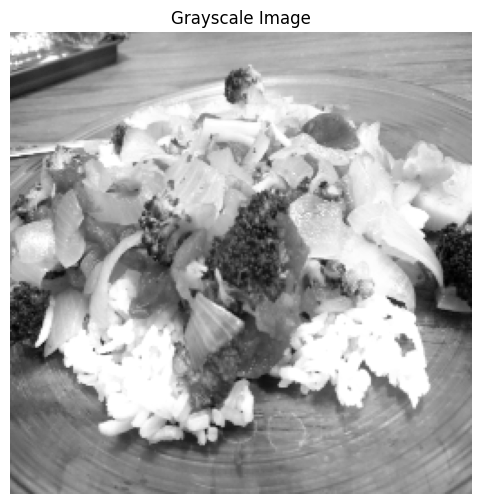

In [ ]:
# 3. Convert to grayscale
gray_image = color.rgb2gray(resized_image )

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

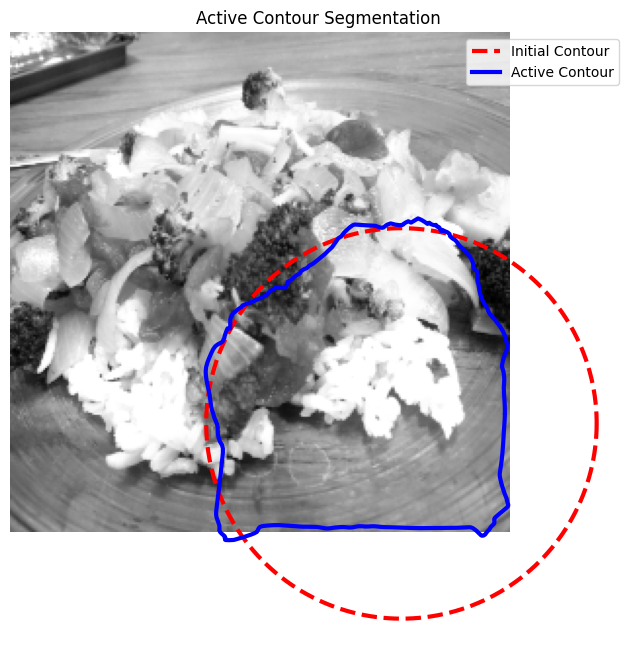

In [ ]:
# 4. Apply segmentation (active contour)
s = np.linspace(0, 2 * np.pi, 400)
x = 200 + 100 * np.cos(s)
y = 200 + 100 * np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gray_image, init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3, label="Initial Contour")
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3, label="Active Contour")
ax.set_title("Active Contour Segmentation")
ax.axis("off")
plt.legend()
plt.show()

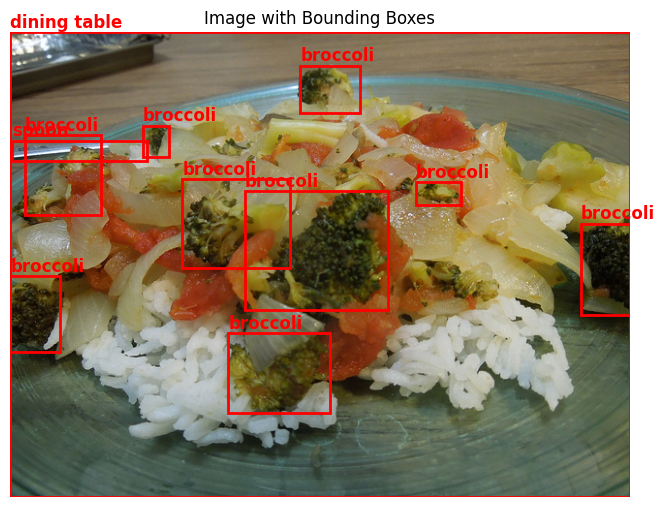

In [ ]:
# 5. Draw bounding boxes from annotations
image_annotations = get_annotations_for_image(image_id, annotations)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_rgb)
for ann in image_annotations:
    bbox = ann['bbox']
    category_id = ann['category_id']
    category_name = category_mapping[category_id]

    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(bbox[0], bbox[1] - 5, category_name, color='red', fontsize=12, weight='bold')

ax.set_title("Image with Bounding Boxes")
ax.axis("off")
plt.show()

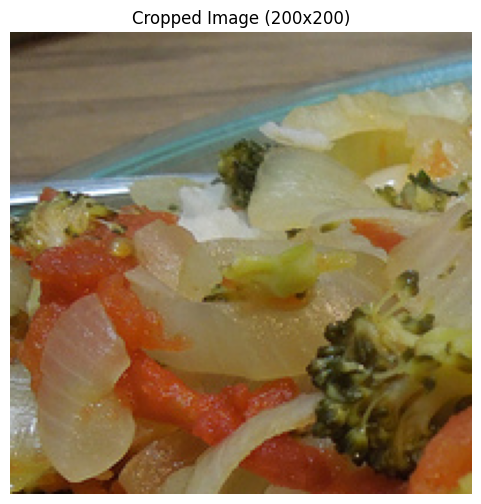

In [ ]:
# 6. Random Image Cropping (example)
crop_x, crop_y = 50, 50  # Specify crop dimensions
cropped_image = image_rgb[crop_y:crop_y+200, crop_x:crop_x+200]

plt.figure(figsize=(6, 6))
plt.imshow(cropped_image)
plt.title("Cropped Image (200x200)")
plt.axis("off")
plt.show()